In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# Cosine similarity: video-comment alignment

In [3]:
all_data_pairwise = []

for file in os.listdir("./results"):
    if file.startswith("cosine_videocomm_group") and "all_noscaled.pkl" in file:
        cluster_n = file.split("_")[-3]
        with open("./results/"+file, "rb") as f:
            diff_cos_yt_group = pickle.load(f)
            # to dataframe
            diff_cos_yt_group = pd.DataFrame(diff_cos_yt_group)
            diff_cos_yt_group["group"] = ["group_"+cluster_n for i in range(len(diff_cos_yt_group))]
        all_data_pairwise.append(diff_cos_yt_group)
    # self
    elif file.startswith("cosine_videocomm_self") and "all_noscaled.pkl" in file:
        cluster_n = file.split("_")[-3]
        with open("./results/"+file, "rb") as f:
            diff_cos_yt_self = pickle.load(f)
            # to dataframe
            diff_cos_yt_self = pd.DataFrame(diff_cos_yt_self)
            diff_cos_yt_self["group"] = ["self_"+cluster_n for i in range(len(diff_cos_yt_self))]
        all_data_pairwise.append(diff_cos_yt_self)

# concat all data
all_data_pairwise = pd.concat(all_data_pairwise, axis=0)
# re-define columns
all_data_pairwise.columns = ["cosine_similarity", "video_id", "group"]

# sort by group
all_data_pairwise = all_data_pairwise.sort_values(by="group")

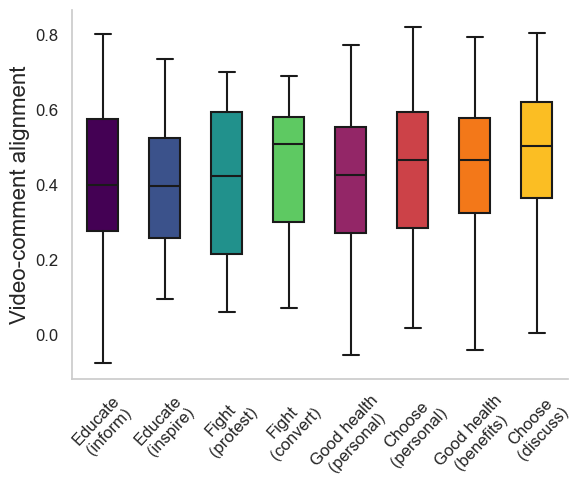

In [4]:
# define color palette
color_dict = {"group_0": plt.cm.viridis(0.0),
                "group_1": plt.cm.viridis(0.25),
                "group_2": plt.cm.viridis(0.5),
                "group_3": plt.cm.viridis(0.75),
                "self_0": plt.cm.inferno(0.4),
                "self_1": plt.cm.inferno(0.55),
                "self_2": plt.cm.inferno(0.7),
                "self_3": plt.cm.inferno(0.85)}
              

# set width of figure
sns.set_theme(style="whitegrid")
# set width of boxplot
ax = sns.boxplot(x=all_data_pairwise["group"], y=all_data_pairwise["cosine_similarity"], showfliers=False, width=0.5, palette=color_dict.values(), saturation=1)

# set y label and font size
ax.set(ylabel='Video-comment alignment')
# set y axis label size
ax.yaxis.label.set_size(16)
# set font size of ticks
ax.tick_params(labelsize=12)

# remove x label 
ax.set(xlabel=None)

# remove top and right spines
sns.despine()

# remove grid
ax.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47)

# change x tick labels
new_labels = ["Educate\n(inform)", "Educate\n(inspire)", "Fight\n(protest)", "Fight\n(convert)",
              "Good health\n(personal)", "Choose\n(personal)", "Good health\n(benefits)", "Choose\n(discuss)"]
ax.set_xticklabels(new_labels)
# xticks labels are not centered, so we need to manually set the xtick positions
ax.set_xticks([0,1,2,3,4,5,6,7])

# save as svg
plt.savefig("./pics/video_comment_align.svg", bbox_inches='tight')

# Silhouette: content concentration

In [5]:
all_data = []

silhouette_group = pd.read_csv("./results/silhouette_scores_ids_group_all_noscaled.csv")
    
with open("./results/labels_group_all_noscaled.pkl", "rb") as f:
    labels_group = pickle.load(f)  
labels_group = ["group_"+str(i) for i in labels_group]

silhouette_self = pd.read_csv("./results/silhouette_scores_ids_self_all_noscaled.csv")

with open("./results/labels_self_all_noscaled.pkl", "rb") as f:
    labels_self = pickle.load(f)  
labels_self = ["self_"+str(i) for i in labels_self]

# to dataframe together with labels
all_data = pd.DataFrame({"silhouette": list(silhouette_group["Silhouette"].values)+list(silhouette_self["Silhouette"].values), "group": labels_group+labels_self, "VideoID": list(silhouette_group["VideoID"].values)+list(silhouette_self["VideoID"].values)})

# sort by group
all_data = all_data.sort_values(by="group")

Select only those videos for which we keep comments

In [7]:
collective_action = pd.read_csv('./data/liwc_collective_action_videos.csv')

In [8]:
all_data = all_data[all_data["VideoID"].isin(collective_action["VideoID"].values)]

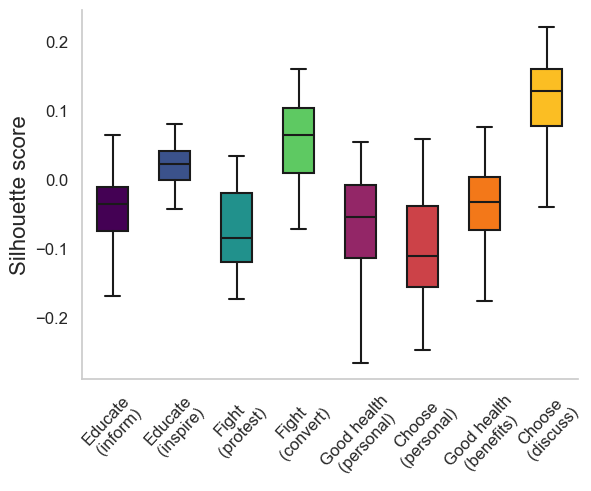

In [9]:
# plot
color_dict = {"group_0": plt.cm.viridis(0.0),
                "group_1": plt.cm.viridis(0.25),
                "group_2": plt.cm.viridis(0.5),
                "group_3": plt.cm.viridis(0.75),
                "self_0": plt.cm.inferno(0.4),
                "self_1": plt.cm.inferno(0.55),
                "self_2": plt.cm.inferno(0.7),
                "self_3": plt.cm.inferno(0.85)}
              

# set sans-serif font
sns.set(font="sans-serif")
sns.set_style("whitegrid")

ax = sns.boxplot(x=all_data["group"], y=all_data["silhouette"], showfliers=False, width=0.5, palette=color_dict.values(), saturation=1)
ax.set(ylabel='Silhouette score')

# remove x label 
ax.set(xlabel=None)
# set y axis label size
ax.yaxis.label.set_size(16)
# set font size of ticks
ax.tick_params(labelsize=12)

# remove top and right spines
sns.despine()

# remove grid
ax.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47)

# change x tick labels
new_labels = ["Educate\n(inform)", "Educate\n(inspire)", "Fight\n(protest)", "Fight\n(convert)",
              "Good health\n(personal)", "Choose\n(personal)", "Good health\n(benefits)", "Choose\n(discuss)"]

ax.set_xticklabels(new_labels)
# xticks labels are not centered, so we need to manually set the xtick positions
ax.set_xticks([0,1,2,3,4,5,6,7])

# save as svg
plt.savefig("./pics/silhouette_videos.svg", bbox_inches='tight')
